<a href="https://colab.research.google.com/github/rrankawat/pytorch-basic/blob/main/04_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.out(X)
    return X

In [179]:
# Pick a manual seed for randomization
torch.manual_seed(32)

# Create a instance of Model
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [180]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [181]:
data['species'] = data['species'].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [182]:
# Train, Test: Split
X = data.drop('species', axis=1)
y = data['species']

# Convert to numpy arrays
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [183]:
# Criterion: To measure the error
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [184]:
# Train our model
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Back propogation: Take the error rate of forward propogation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.169895887374878
Epoch: 10 Loss: 0.9578844308853149
Epoch: 20 Loss: 0.7988812923431396
Epoch: 30 Loss: 0.634953498840332
Epoch: 40 Loss: 0.44043001532554626
Epoch: 50 Loss: 0.291716992855072
Epoch: 60 Loss: 0.17829042673110962
Epoch: 70 Loss: 0.11587586253881454
Epoch: 80 Loss: 0.08928148448467255
Epoch: 90 Loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

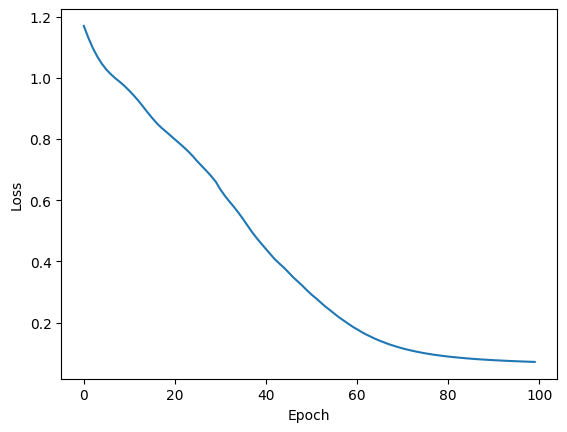

In [185]:
# Plot the loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [186]:
# Evaluate Model on Test Data Set (Validate model on test data)
with torch.no_grad(): # Turn off backpropogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'Loss: {loss}')

Loss: 0.053916968405246735


In [187]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1:2}. {str(y_val):38} {y_test[i]} \t {y_val.argmax().item()}')

    # Correct
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-3.3580,  3.9452,  0.3616])    1 	 1
 2. tensor([  7.5862,   1.1113, -11.3861]) 0 	 0
 3. tensor([  6.6288,   1.5092, -10.4603]) 0 	 0
 4. tensor([-3.3304,  4.2647,  0.0569])    1 	 1
 5. tensor([-7.3705,  2.8135,  5.1481])    2 	 2
 6. tensor([-7.3749,  3.9061,  4.2781])    2 	 2
 7. tensor([  6.2304,   1.6527, -10.0543]) 0 	 0
 8. tensor([  6.8783,   1.4056, -10.7016]) 0 	 0
 9. tensor([-2.6728,  4.3138, -0.6444])    1 	 1
10. tensor([  7.2201,   1.3890, -11.1494]) 0 	 0
11. tensor([-3.8269,  4.4110,  0.5165])    1 	 1
12. tensor([-8.6886,  1.9990,  6.9012])    2 	 2
13. tensor([-2.0605,  3.8275, -0.7672])    1 	 1
14. tensor([-1.0676,  4.3809, -2.2975])    1 	 1
15. tensor([-7.5000,  2.6230,  5.3318])    2 	 2
16. tensor([-8.6214,  1.5491,  7.1280])    2 	 2
17. tensor([-3.7724,  3.6503,  0.9422])    1 	 1
18. tensor([-6.7624,  2.7791,  4.5289])    2 	 2
19. tensor([-1.6978,  4.2047, -1.4772])    1 	 1
20. tensor([  7.8104,   1.3824, -11.9435]) 0 	 0
21. tensor([  6.9175

In [188]:
# Evaluate on new data
new_iris1 = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  print(model.forward(new_iris1))
  print(model.forward(new_iris1).argmax().item())

tensor([  6.9155,   1.2532, -10.6096])
0


In [189]:
new_iris2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
  print(model.forward(new_iris2))
  print(model.forward(new_iris2).argmax().item())

tensor([-6.7319,  2.6637,  4.5465])
2
